<a href="https://colab.research.google.com/github/nilusrubanathan-byte/MSC-AI-University-of-Essex/blob/main/Unit_2_Seminar_Title_EDA_Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the dataset

### Subtask:
Load the data from "/content/Unit02 auto-mpg (1).csv" into a pandas DataFrame.


In [1]:
import pandas as pd

df = pd.read_csv("/content/Unit02 auto-mpg (1).csv")
display(df.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
missing_values = df.isnull().sum()
display(missing_values)

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [3]:
skewness = df.skew(numeric_only=True)
display("Skewness:")
display(skewness)

kurtosis = df.kurtosis(numeric_only=True)
display("Kurtosis:")
display(kurtosis)

'Skewness:'

,0
mpg,0.457066
cylinders,0.526922
displacement,0.719645
weight,0.531063
acceleration,0.278777
model year,0.011535
origin,0.923776


'Kurtosis:'

,0
mpg,-0.510781
cylinders,-1.376662
displacement,-0.746597
weight,-0.785529
acceleration,0.419497
model year,-1.181232
origin,-0.817597


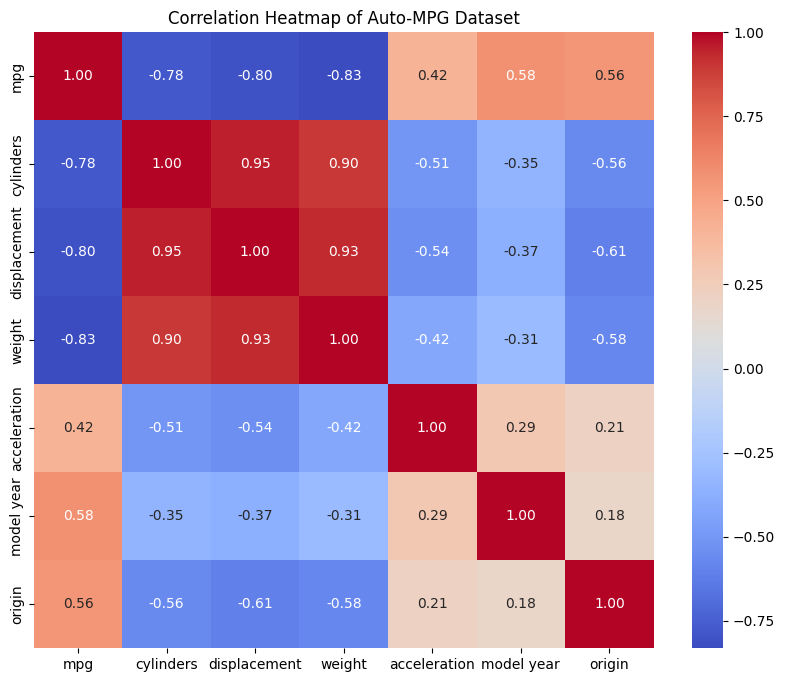

In [4]:
correlation_matrix = df.corr(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Auto-MPG Dataset")
plt.show()

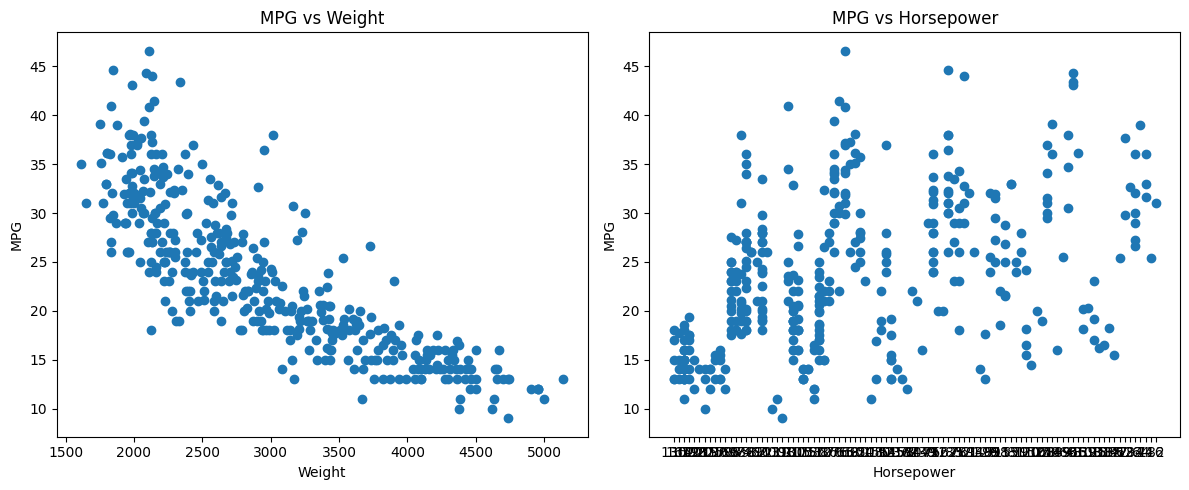

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['weight'], df['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('MPG vs Weight')

plt.subplot(1, 2, 2)
plt.scatter(df['horsepower'], df['mpg'])
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower')

plt.tight_layout()
plt.show()

In [6]:
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns identified:")
print(categorical_cols)

# Apply one-hot encoding to the identified categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataFrame after one-hot encoding:")
display(df.head())

print("\nData types after encoding:")
display(df.dtypes)

Categorical columns identified:
Index(['horsepower', 'car name'], dtype='object')

DataFrame after one-hot encoding:


,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower_102,horsepower_103,horsepower_105,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,18.0,8,307.0,3504,12.0,70,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,8,350.0,3693,11.5,70,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,18.0,8,318.0,3436,11.0,70,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,16.0,8,304.0,3433,12.0,70,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,17.0,8,302.0,3449,10.5,70,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False



Data types after encoding:


,0
mpg,float64
cylinders,int64
displacement,float64
weight,int64
acceleration,float64
...,...
car name_vw dasher (diesel),bool
car name_vw pickup,bool
car name_vw rabbit,bool
car name_vw rabbit c (diesel),bool


## Summary:

### Data Analysis Key Findings

*   The dataset was loaded successfully and contains columns such as 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', and 'car name'.
*   There are no missing values in the dataset.
*   Numerical columns show varying degrees of skewness and kurtosis, indicating non-normal distributions for some features.
*   The correlation heatmap revealed relationships between numerical features. For instance, 'weight' and 'horsepower' show strong negative correlations with 'mpg'.
*   Scatter plots visualize the relationships between 'weight' and 'mpg', and 'horsepower' and 'mpg', confirming the negative correlations observed in the heatmap.
*   Categorical columns 'horsepower' and 'car name' were identified and successfully converted into numerical representations using one-hot encoding.

### Insights or Next Steps

*   The strong negative correlations between 'weight', 'horsepower', and 'mpg' suggest these features are significant predictors of fuel efficiency and could be key variables in a predictive model.
*   The presence of non-normal distributions (indicated by skewness and kurtosis) might require data transformations for certain modeling techniques that assume normality.
